<a href="https://colab.research.google.com/github/anjumverma/anomaly-data/blob/main/Anoma_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float

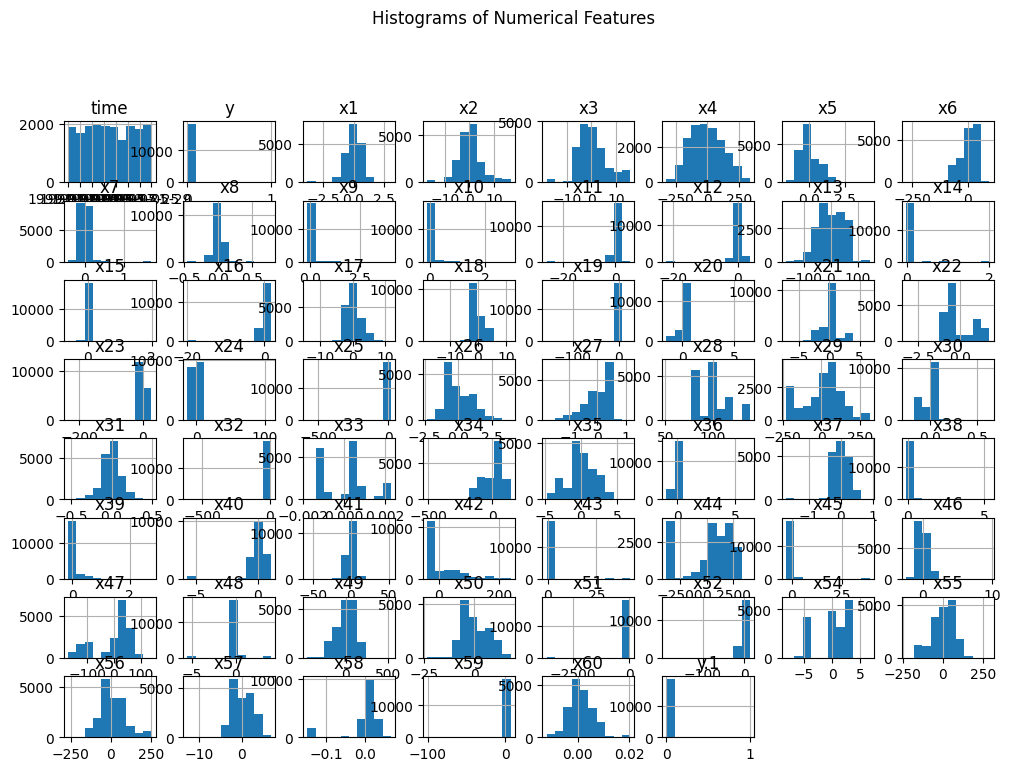

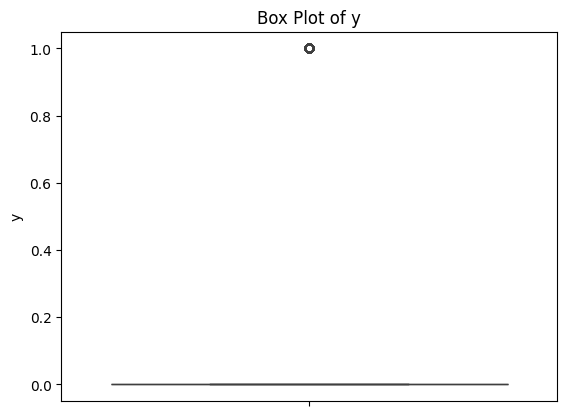

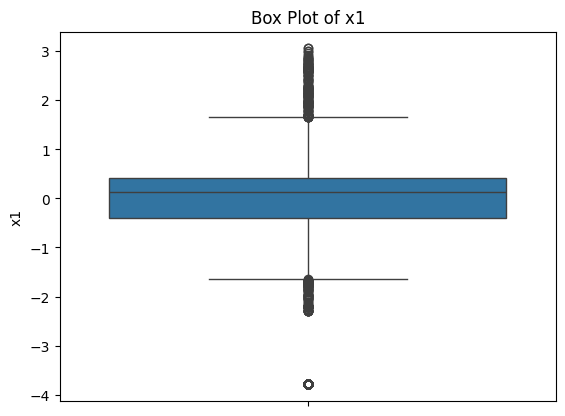

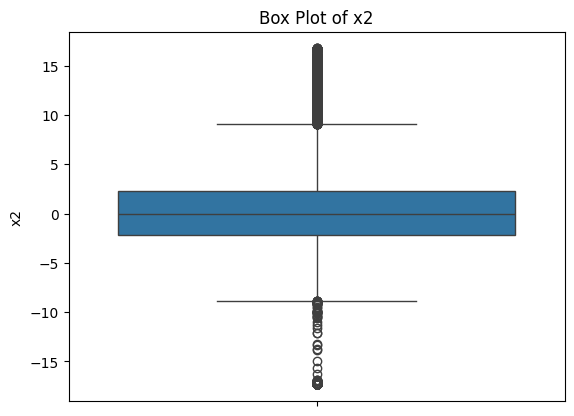

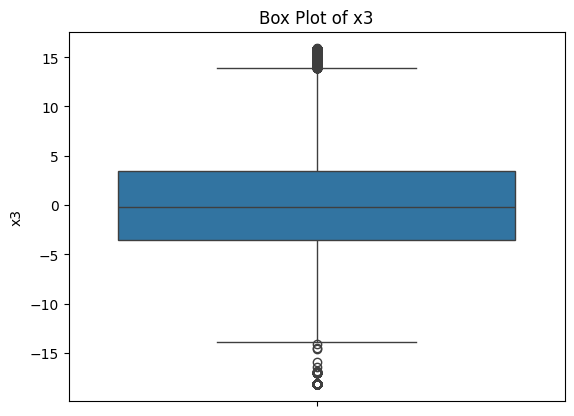

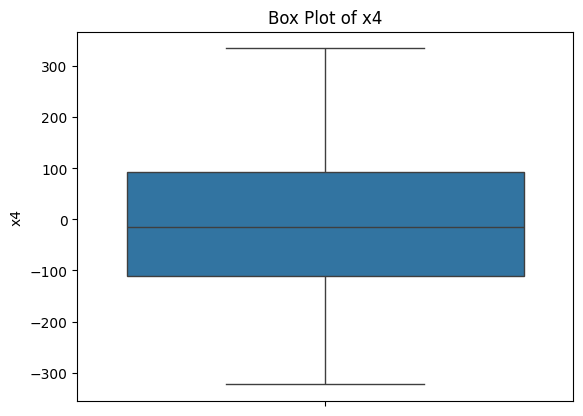

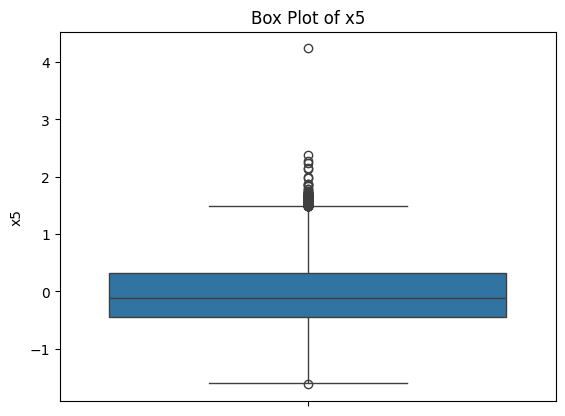

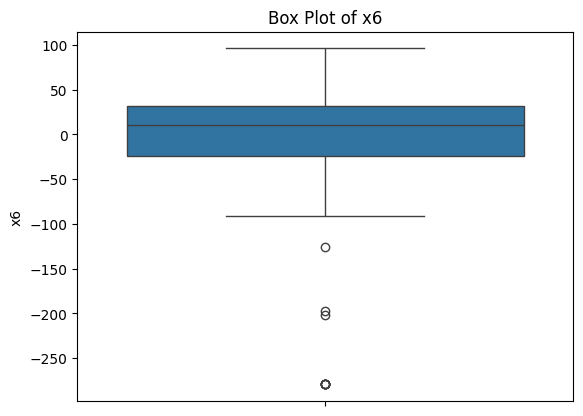

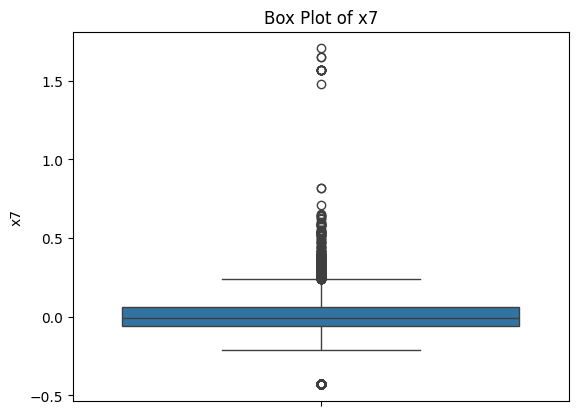

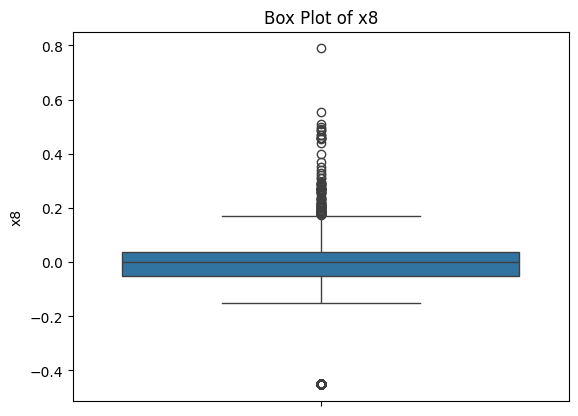

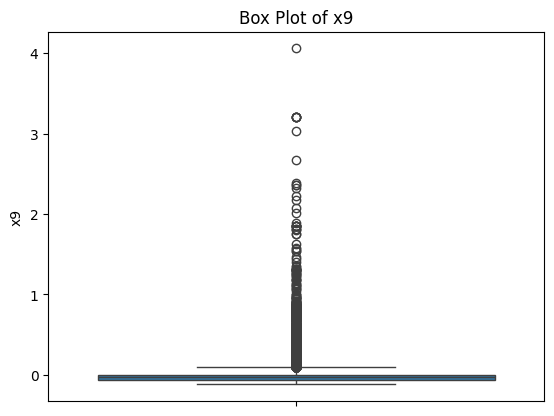

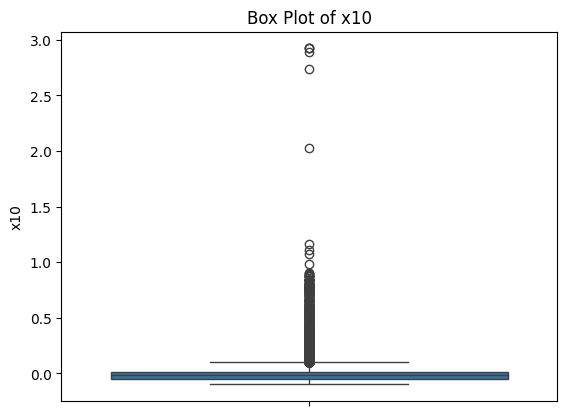

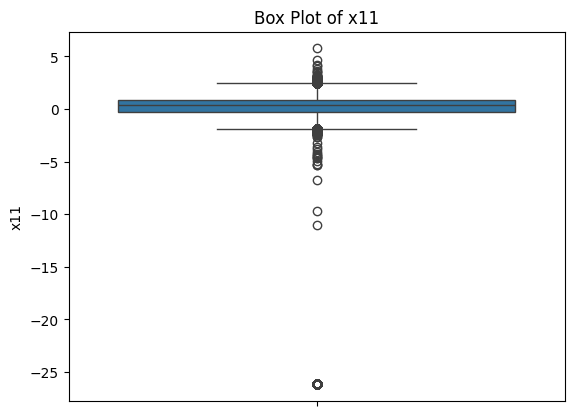

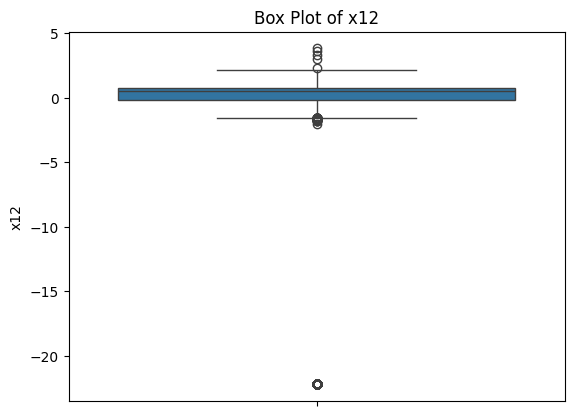

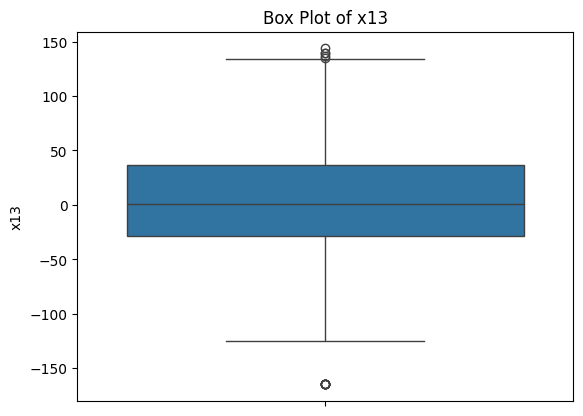

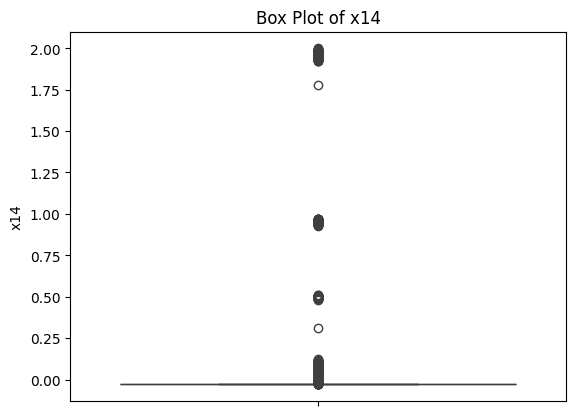

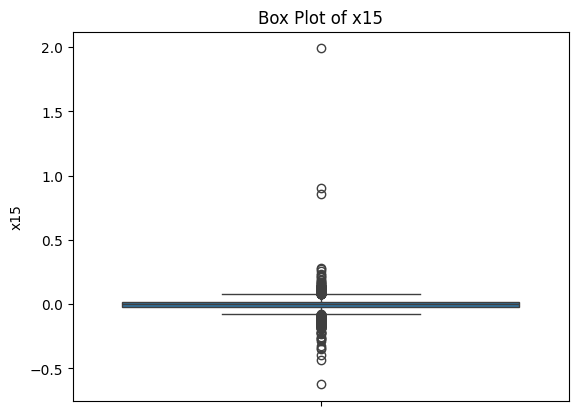

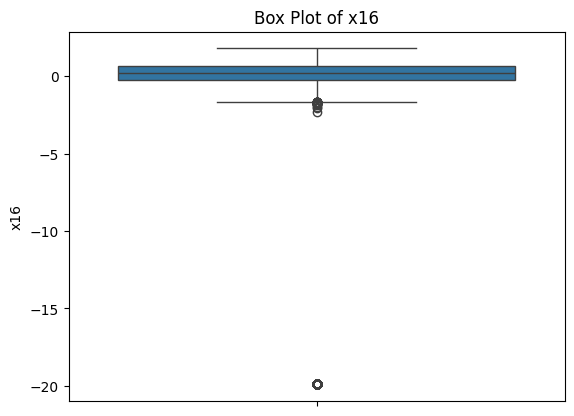

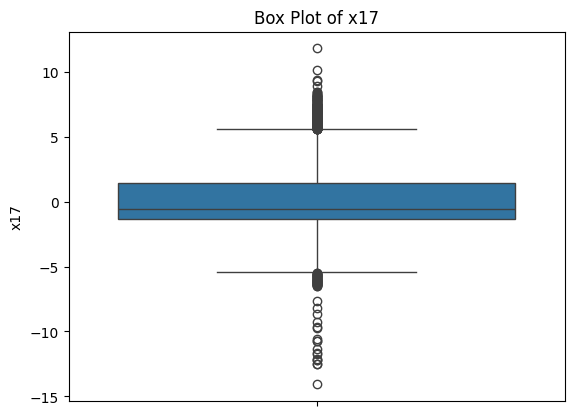

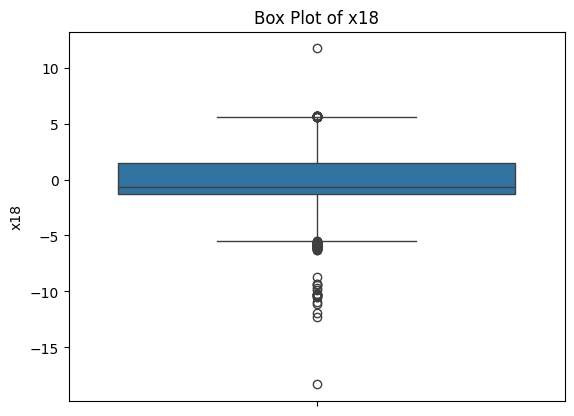

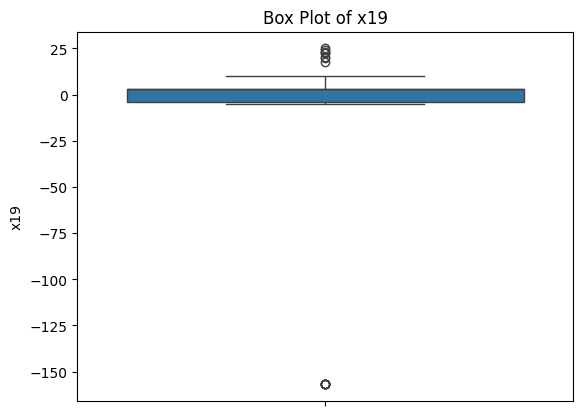

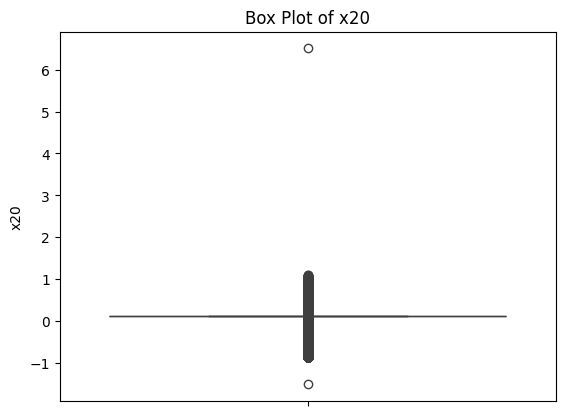

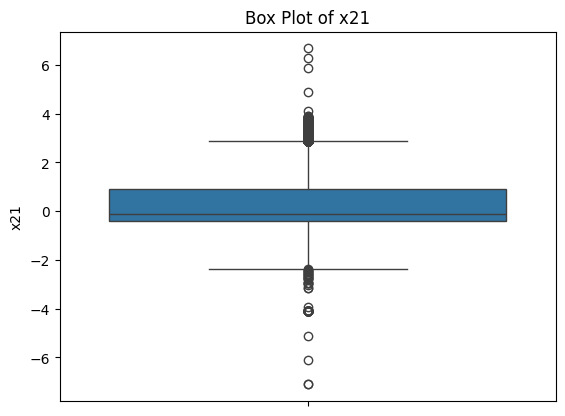

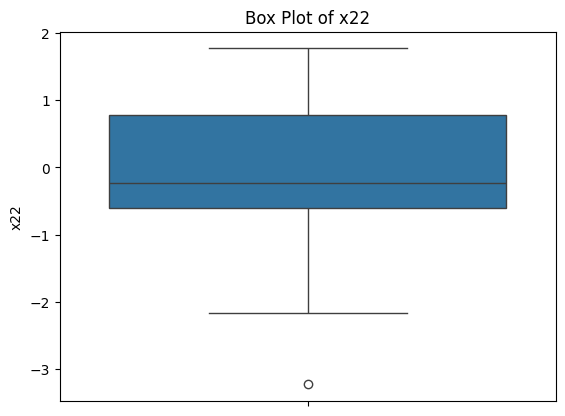

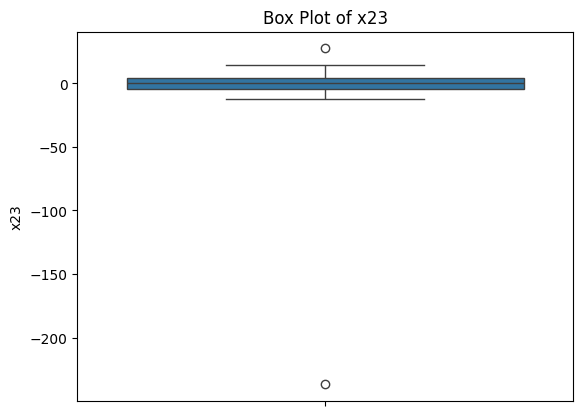

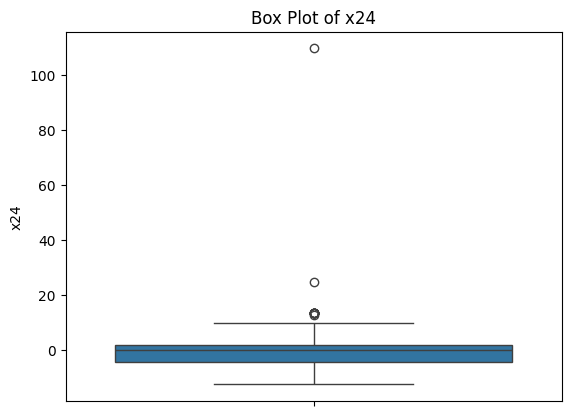

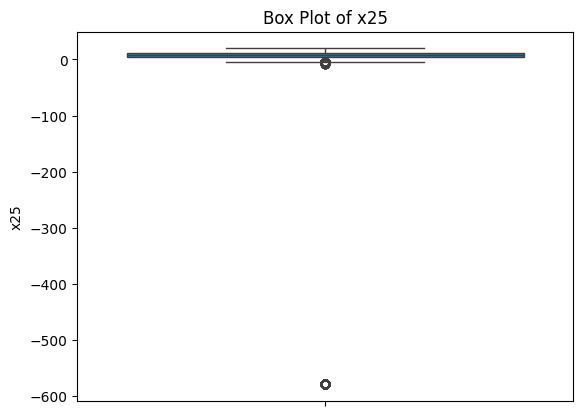

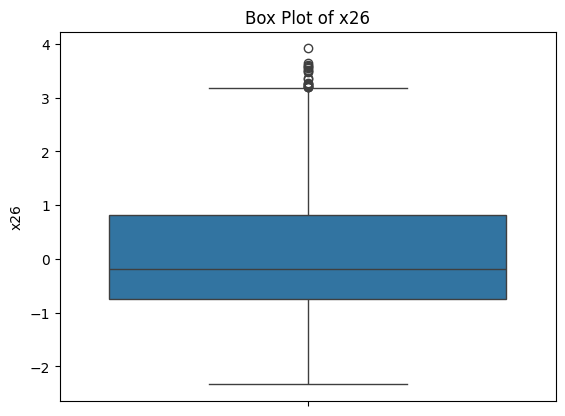

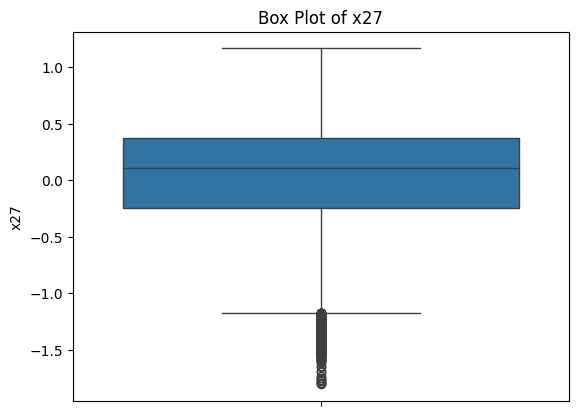

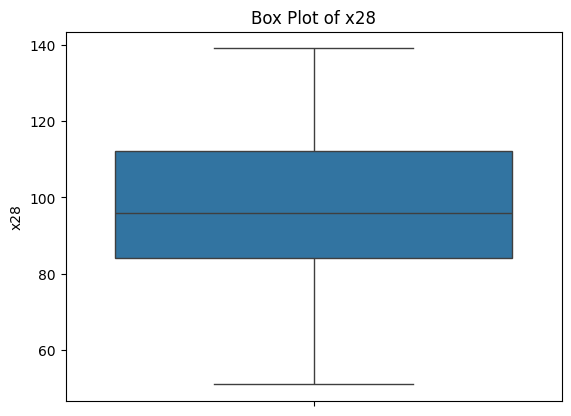

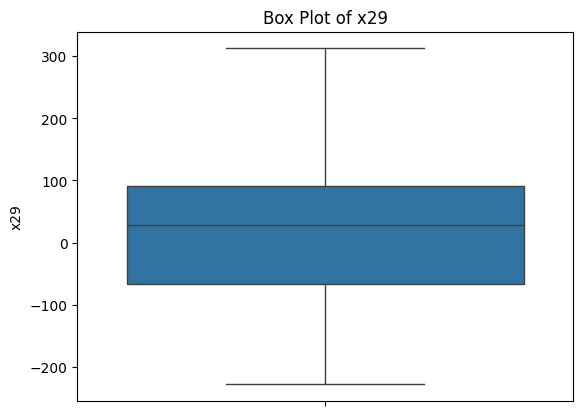

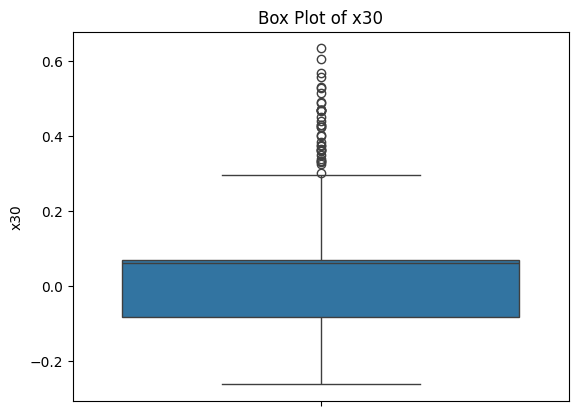

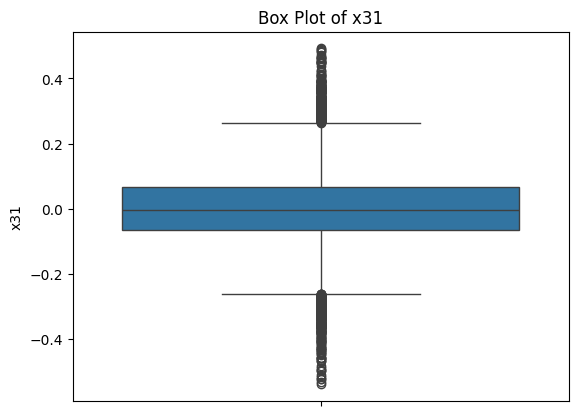

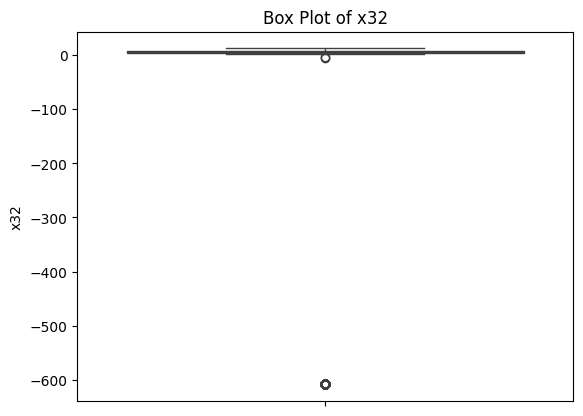

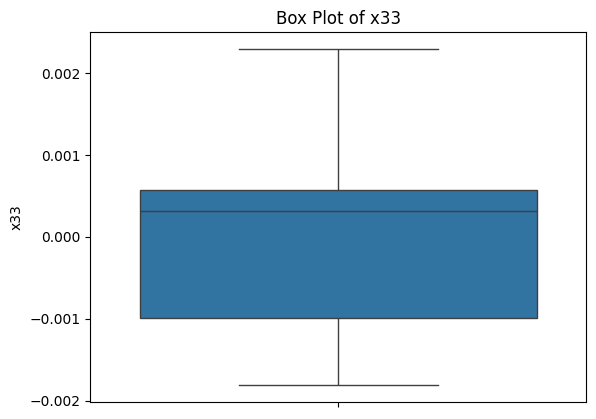

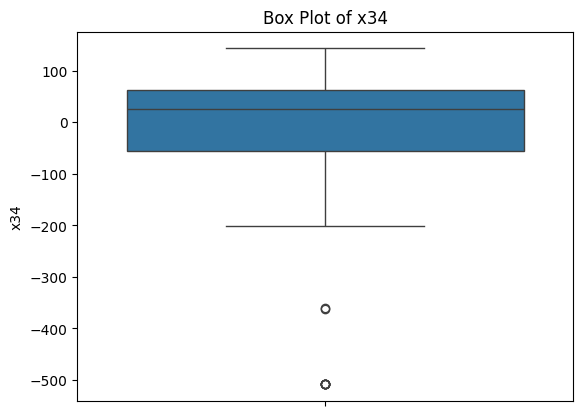

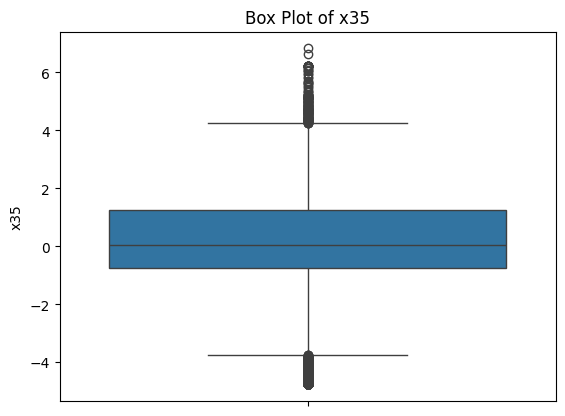

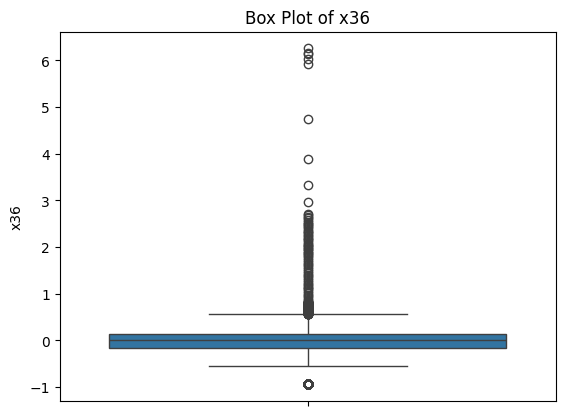

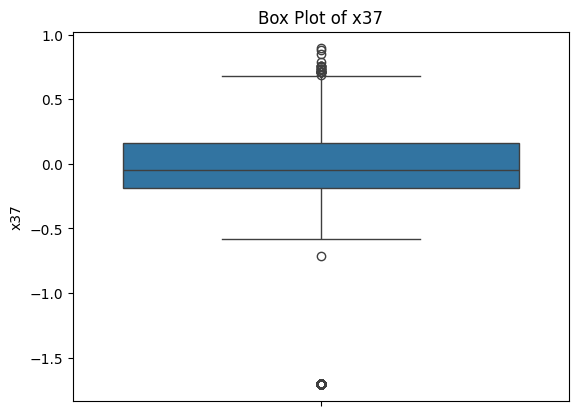

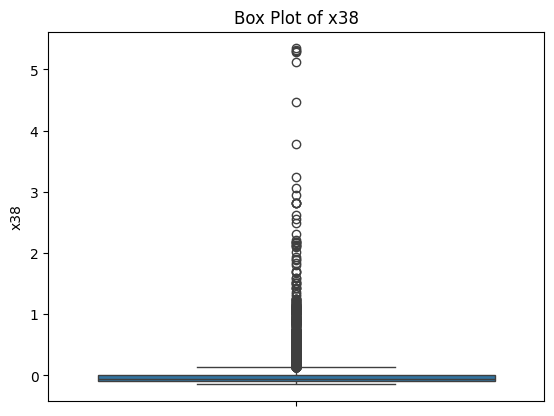

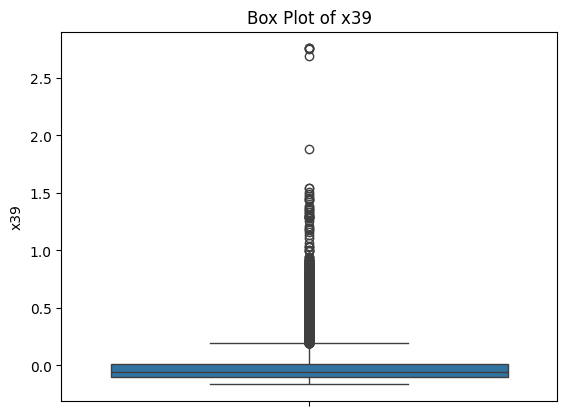

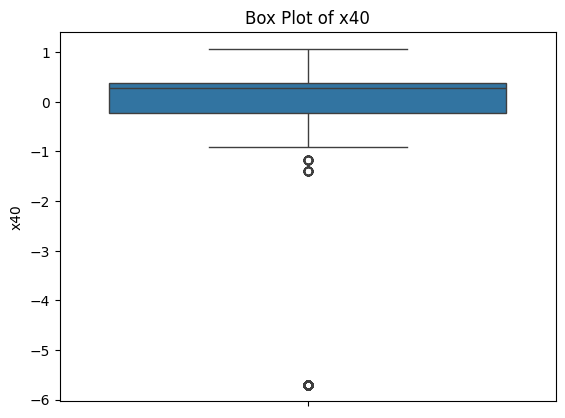

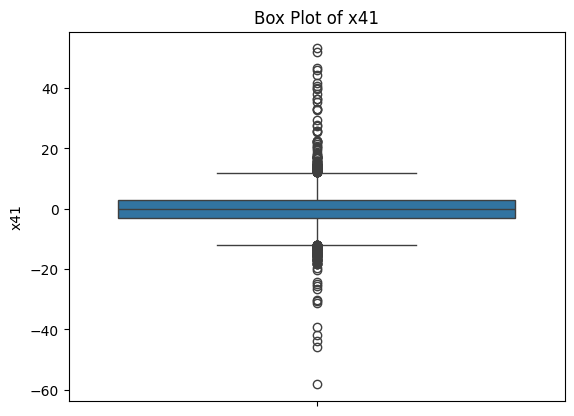

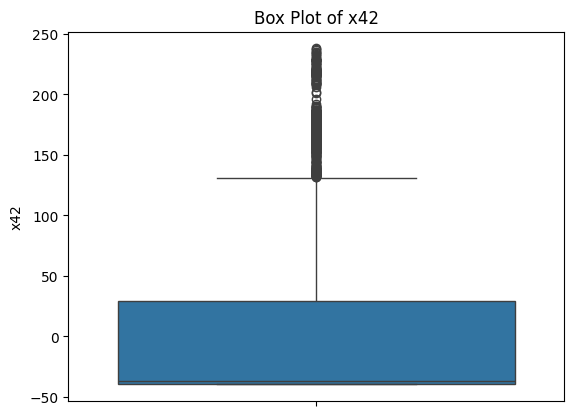

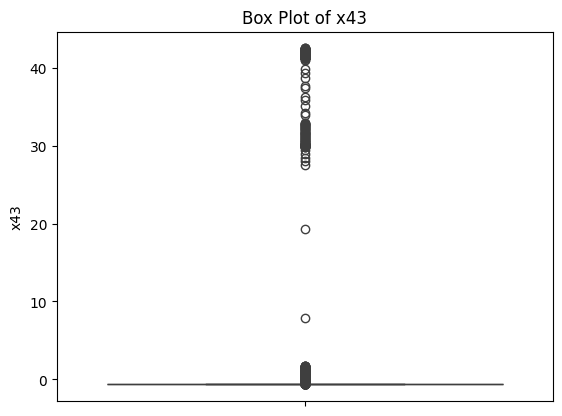

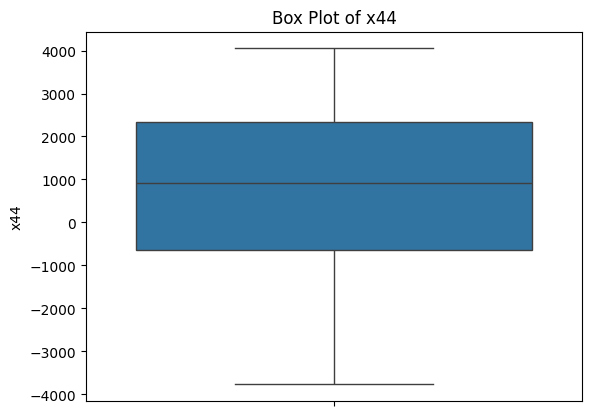

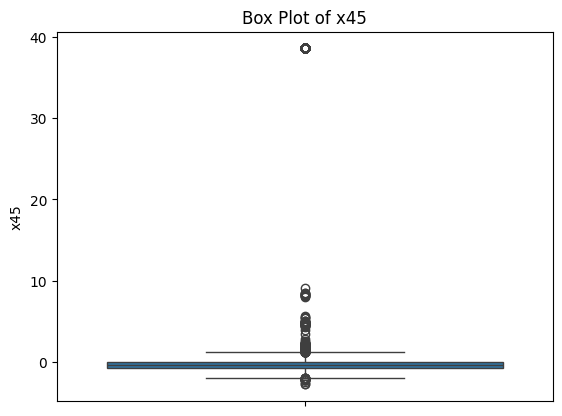

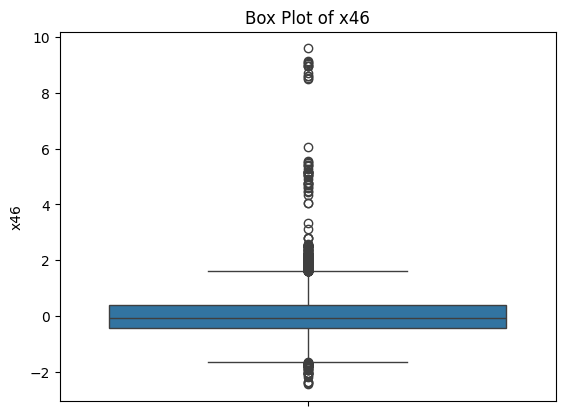

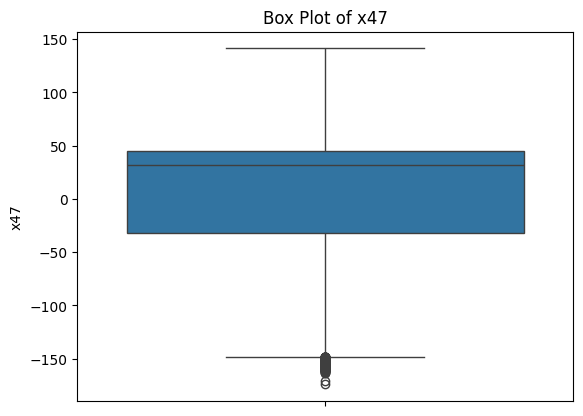

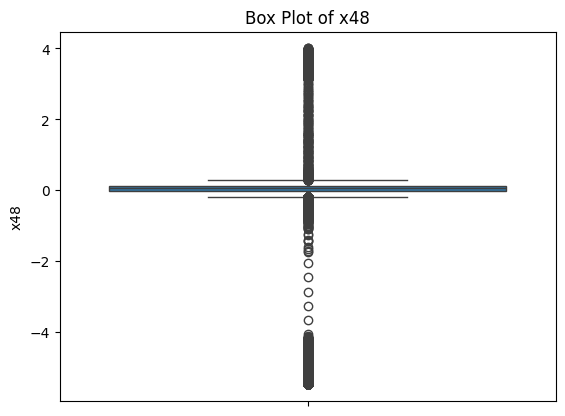

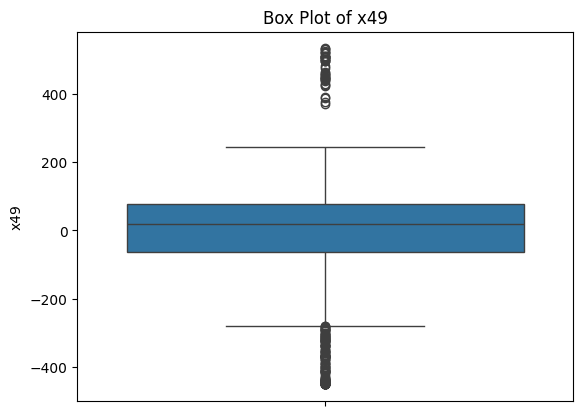

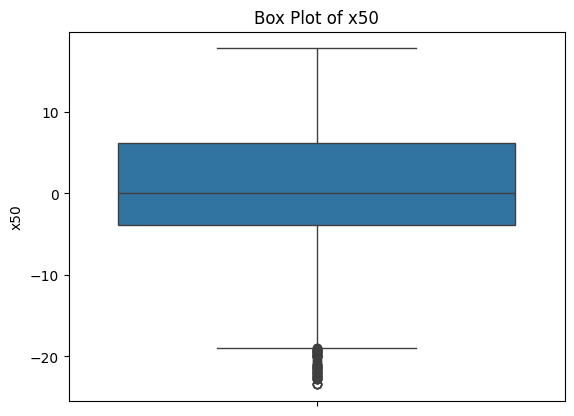

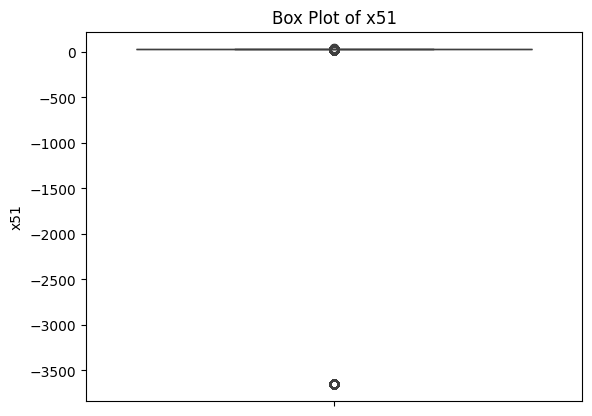

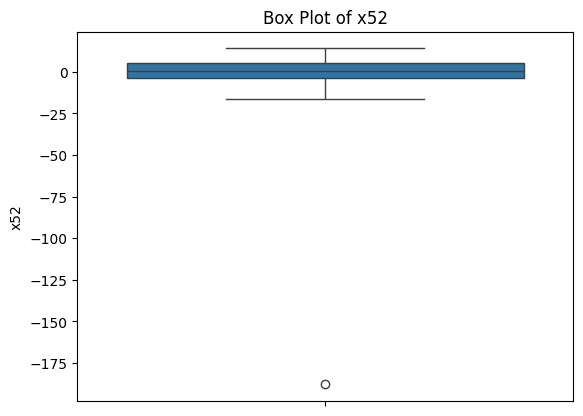

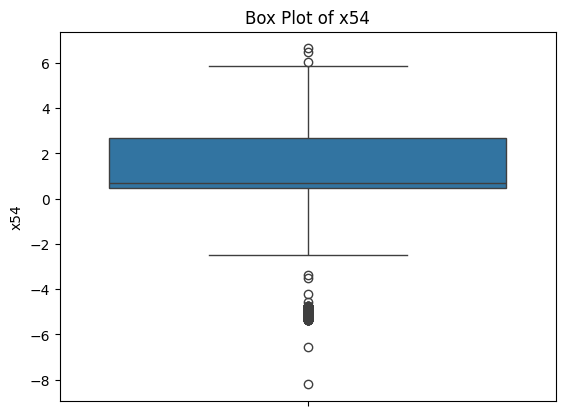

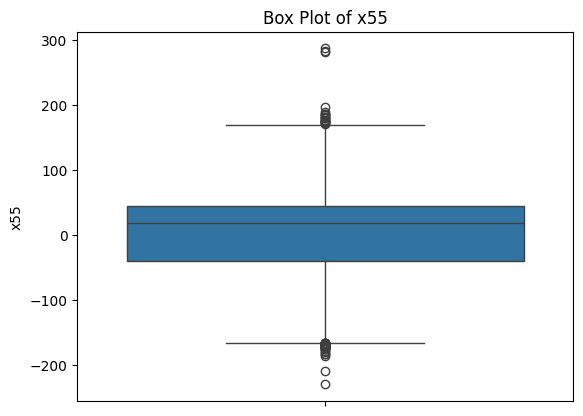

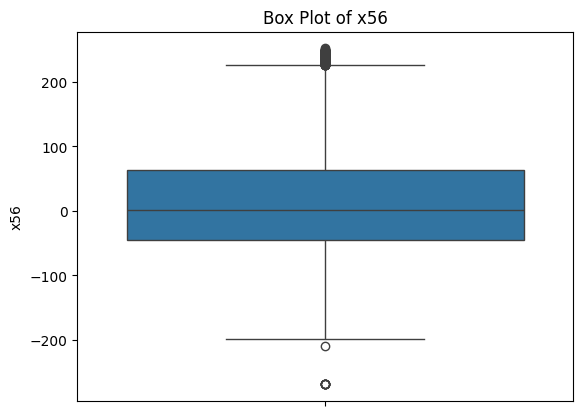

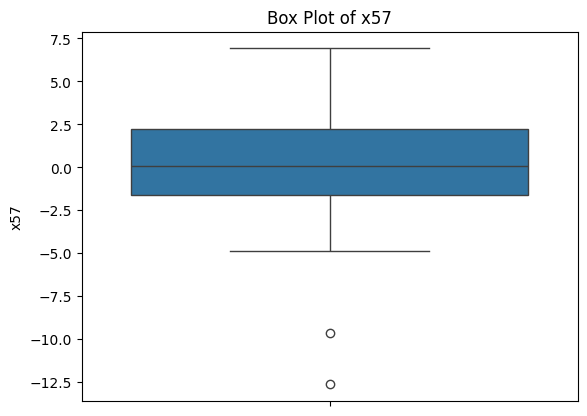

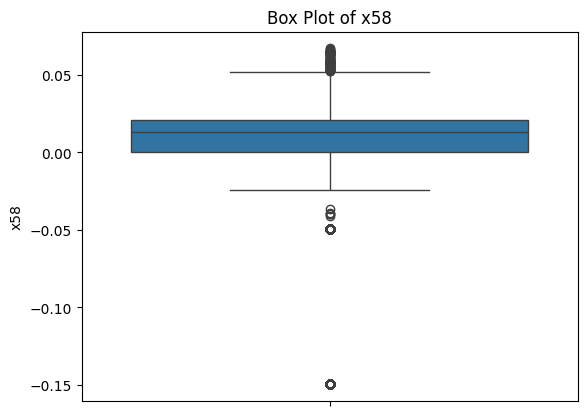

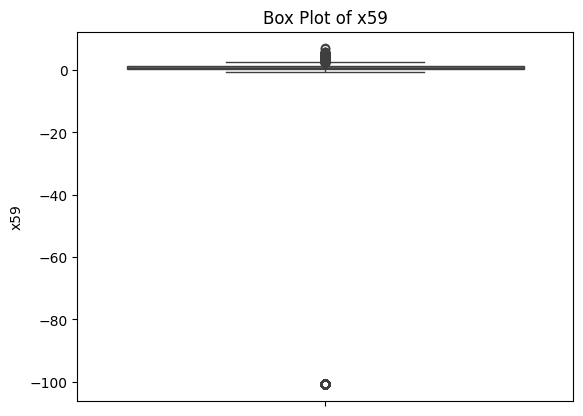

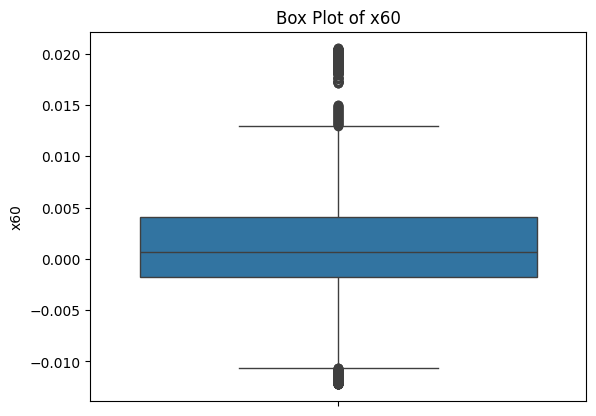

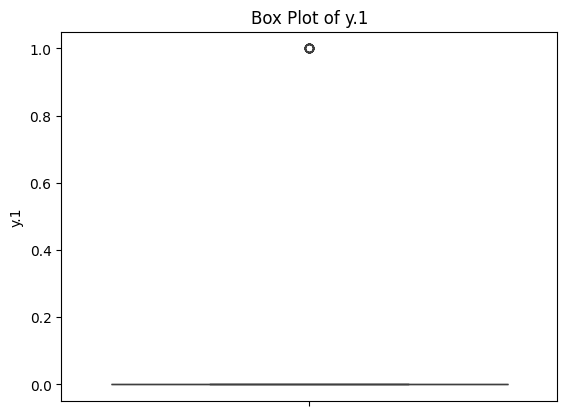

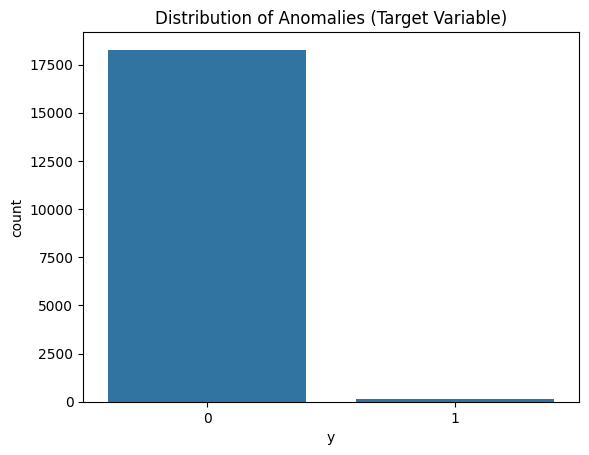

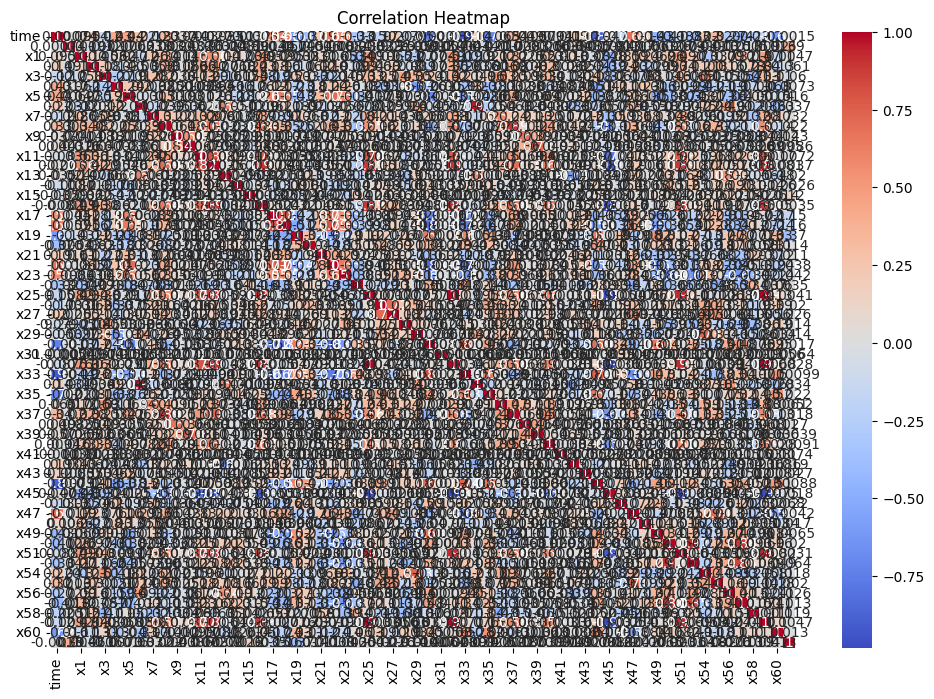

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('/Anoma  Data.xlsx')

# --- Step 1: Exploratory Data Analysis (EDA) ---
print("Dataset Information:")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.head())

# --- Descriptive Statistics ---
print("\nSummary Statistics:")
print(df.describe())

# --- Visualizations ---
# 1. Histograms for numerical features
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

# 2. Box plots for numerical features
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

# 3. Bar plot for the target variable
sns.countplot(data=df, x='y')
plt.title('Distribution of Anomalies (Target Variable)')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Prints dataset information (columns, data types, etc.).
Prints the first 5 rows of the dataset.
Prints descriptive statistics (mean, std, min, max, etc.).
Displays histograms and box plots for numerical features to visualize their distributions.
Shows a bar plot of the target variable ('y') to see the class distribution.
Displays a correlation heatmap to see relationships between features.

In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_excel('/Anoma  Data.xlsx')

# --- Handling Missing Values ---

# 1. Impute Numerical Features with Mean
numerical_features = df.select_dtypes(include=np.number).columns
num_imputer = SimpleImputer(strategy='mean')
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

# 2. Impute Categorical Features with Most Frequent Value
# Exclude 'time' column from categorical features
categorical_features = df

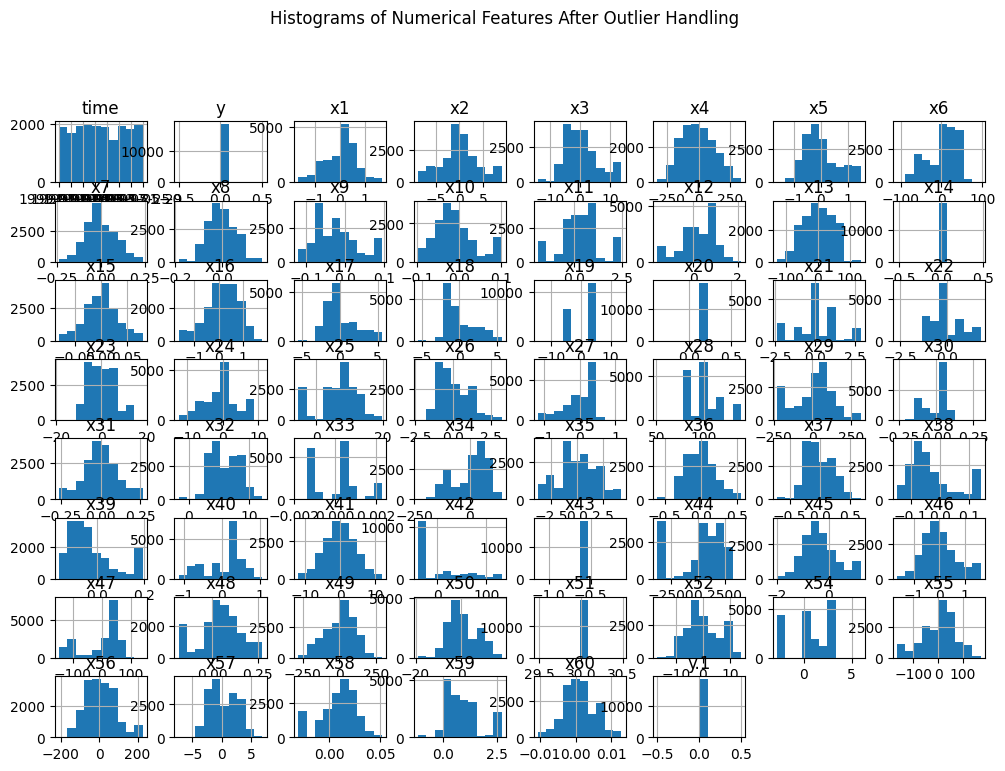

In [21]:
# --- Handling Outliers ---
# Using IQR method to identify and cap outliers
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply outlier capping to numerical features
# Change df_imputed to df
for col in df.select_dtypes(include=np.number).columns:
    df = cap_outliers_iqr(df, col)  # Change df_imputed to df here as well

# Visualize the distribution after outlier handling
# Change df_imputed to df
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features After Outlier Handling', y=1.02)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

# --- Standardization ---
scaler = StandardScaler()
# Drop the 'time' column before scaling (and 'y' which is your target variable)
X_scaled = scaler.fit_transform(df.drop(columns=['time', 'y']))
X_scaled = pd.DataFrame(X_scaled, columns=df.drop(columns=['time', 'y']).columns)

In [25]:
# --- Step 3: Feature Engineering ---
# Example: Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_poly = pd.DataFrame(X_poly)

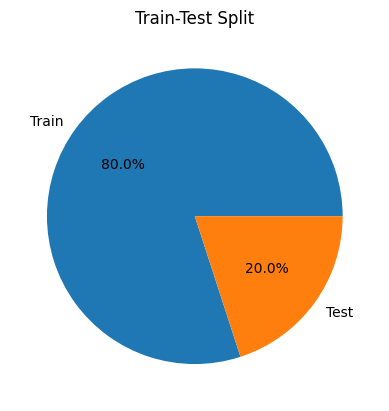

In [29]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# --- Step 4: Train/Test Split ---
X = X_poly  # Use the engineered features
y = df['y']  # Change df_imputed to df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Visualize train-test split
plt.pie([len(y_train), len(y_test)], labels=['Train', 'Test'], autopct='%1.1f%%') # Add autopct for percentage labels
plt.title('Train-Test Split')
plt.show()

Outcome:

Splits the data into training and testing sets (80% train, 20% test).
stratify=y ensures that the class proportions are maintained in both sets.
Displays a pie chart to visualize the train-test split proportions.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Step 5: Model Selection and Training ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# --- Step 6: Model Evaluation ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test data: 1.00

Confusion Matrix:
[[3680]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3680

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Outcome:

Trains a Random Forest Classifier on the training data.
Makes predictions on the test data.
Prints the accuracy, confusion matrix, and classification report to evaluate the model's performance.

In [31]:
from sklearn.model_selection import GridSearchCV

# --- Step 7: Hyperparameter Tuning ---
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid_search.best_params_)

# Evaluate the tuned model
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy on test data: {accuracy_tuned:.2f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Model Accuracy on test data: 1.00


In [ ]:
import joblib

# --- Step 8: Model Deployment Plan ---
# Save the trained model to a file
joblib.dump(tuned_model, 'anomaly_detection_model.pkl')
print("\nThe trained model is saved as 'anomaly_detection_model.pkl'.")

# --- Model Deployment (using Flask) ---
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_df = pd.DataFrame([data])

    # Preprocess input data (apply the same steps as in training)
    input_df_imputed = pd.DataFrame(imputer.transform(input_df), columns=input_df.columns)
    for col in input_df_imputed.select_dtypes(include=np.number).columns:
        input_df_imputed = cap_outliers_iqr(input_df_imputed, col)
    input_scaled = scaler.transform(input_df_imputed)
    input_poly = poly.transform(input_scaled)

    prediction = tuned_model.predict(input_poly)[0]
    return jsonify({'anomaly': prediction})

if __name__ == '__main__':
    app.run(debug=True)


The trained model is saved as 'anomaly_detection_model.pkl'.
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# New Section

Conclusion:

Based on the provided code and assuming you have a dataset with anomalies to detect, the process aims to build and deploy a machine learning model for anomaly detection. Here's a general conclusion you can draw:

The code demonstrates a standard machine learning workflow, including EDA, data preprocessing, feature engineering, model training, evaluation, hyperparameter tuning, and deployment.
By addressing missing values, outliers, and scaling features, the code aims to improve the model's performance.
Feature engineering (polynomial features in this case) can help capture non-linear relationships in the data.
Hyperparameter tuning helps optimize the model for better generalization.
Deploying the model using Flask makes it accessible for real-time predictions.
Specific conclusions will depend on your dataset and the results you obtain:

Model Performance: How well does the model perform on the test data? What is the accuracy, precision, recall, F1-score, and AUC?
Hyperparameter Tuning: Does hyperparameter tuning significantly improve the model's performance?
Feature Importance: Which features are most important for anomaly detection? (One can extract feature importances from the trained Random Forest model.)
Deployment: Is the Flask app successfully deployed and making predictions?
By analyzing the visualizations and metrics, you can draw more specific conclusions about the effectiveness of the anomaly detection model and its suitability for your application.